<a href="https://colab.research.google.com/github/pallasiri/Sparks-Foundation/blob/main/Iris_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task - 2: K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Done By: P Sirisha

# Importing Packages

In [24]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Loading the Dataset**

In [25]:
data = datasets.load_iris()

**Converting to DataFrame**

In [26]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
x = df

#Finding the optimum number of clusters for k-means classification


In [ ]:
wcss = []
for i in range(1,20):
  model=KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
  model.fit(x)
  wcss.append(model.inertia_)



*  If the value of K is huge, then the no. of points within a cluster will be less and hence the inertia will be less
*  Therefore we use elbow method which allows us to pick the optimum no. of clusters for classification.





# Plotting Elbow Technique

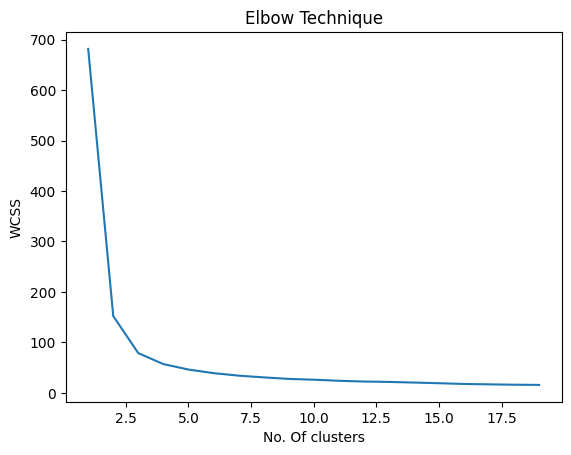

In [29]:
plt.plot(range(1,20), wcss)
plt.title("Elbow Technique")
plt.xlabel("No. Of clusters")
plt.ylabel("WCSS")
plt.show()

· Using Elbow method and Inertia which is the sum of squared distances of the samples to their closest cluster centre, we founded Optimal no. of clusters required to segment the observations

# Applying kmeans to the dataset

In [30]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 30)
y_predict = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [32]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [34]:
df['cluster'] = y_predict
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [36]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

**Visualising the clusters - On the first two columns**

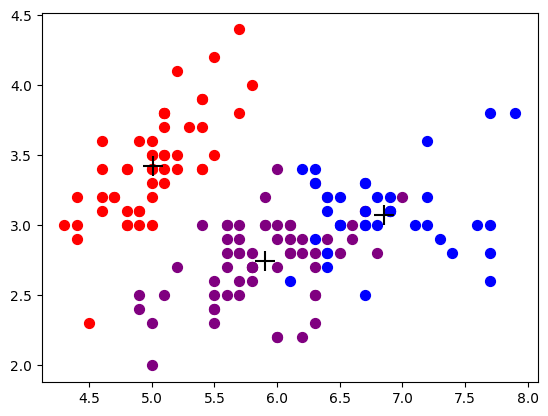

In [41]:
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], s=50,c='red', label = 'Iris-setosa')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], s=50,c='purple', label = 'Iris-versicolour' )
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], s=50,c='blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',marker='+', label = 'centroids')

· We can get an absolute segmentation when we put higher K values but if the points with in each cluster are very less then the variation on the real data will be high leading it into over simplifying the data

· So, with K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 different clusters with minimal error in segmentation